<a href="https://colab.research.google.com/github/bongaaaaA/Deep_Learning/blob/main/image_color_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "color_blindness"

if image_path.is_dir():
  print(f"{image_path} directoly already")
else:
  print(f"{image_path} is not ready")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "color_blindness.zip", "wb") as f:
  request = requests.get("https://github.com/bongaaaaA/datasets/raw/main/Color%20Recognition.zip")
  print("download dataset color blindness")
  f.write(request.content)

with zipfile.ZipFile(data_path / "color_blindness.zip", "r") as file_zib :
  print("upload data from github")
  file_zib.extractall(image_path)

data/color_blindness is not ready
download dataset color blindness
upload data from github


In [2]:
import os

def walk_data(dir_path):
  """
  walk through dir_path return this content
  """
  for dir_path, dir_name, file_name in os.walk(dir_path):
    print(f"there are {len(dir_name)} directory {len(file_name)} images in '{dir_path}'")

In [3]:
train_dir = image_path /"Color Recognition" / "Train"
test_dir = image_path / "Color Recognition" /"Test"
valid_dir = image_path / "Color Recognition" /"Valid"

train_dir, test_dir, valid_dir

(PosixPath('data/color_blindness/Color Recognition/Train'),
 PosixPath('data/color_blindness/Color Recognition/Test'),
 PosixPath('data/color_blindness/Color Recognition/Valid'))

In [4]:
test_dir

PosixPath('data/color_blindness/Color Recognition/Test')

In [5]:
import random
from PIL import Image

In [6]:
image_path

PosixPath('data/color_blindness')

random image path data/color_blindness/Color Recognition/Train/violet/violet - Copy (49).png
class this image violet
image height is :200 and width :150


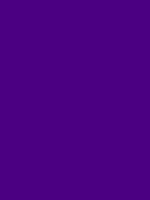

In [7]:
# random.seed(42)
image_path_list = list(image_path.glob("*/*/*/*.png"))

random_image = random.choice(image_path_list)

image_class = random_image.parent.stem

img = Image.open(random_image)

print(f"random image path {random_image}")
print(f"class this image {image_class}")
print(f"image height is :{img.height} and width :{img.width}")
img

(np.float64(-0.5), np.float64(149.5), np.float64(199.5), np.float64(-0.5))

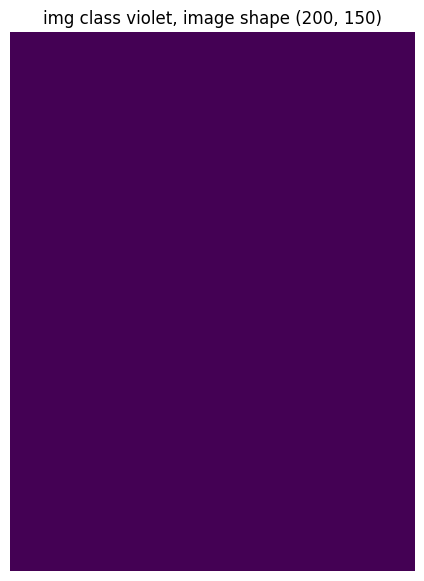

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=((10,7)))
plt.imshow(img_as_array)
plt.title(f"img class {image_class}, image shape {img_as_array.shape}")
plt.axis(False)

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
data_transform = transforms.Compose([
    # resize the image
    transforms.Resize(size=(64,64)),
    # random image
    transforms.RandomHorizontalFlip(p=0.5),
    # torch tensour
    transforms.ToTensor()
])

In [11]:
data_transform(img).dtype

torch.float32

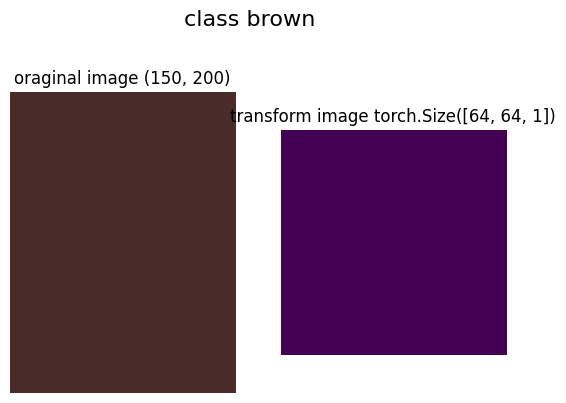

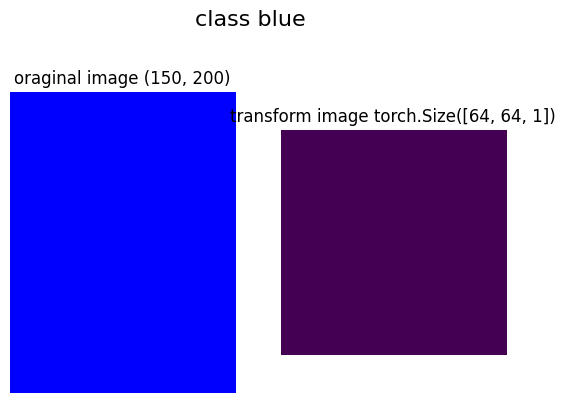

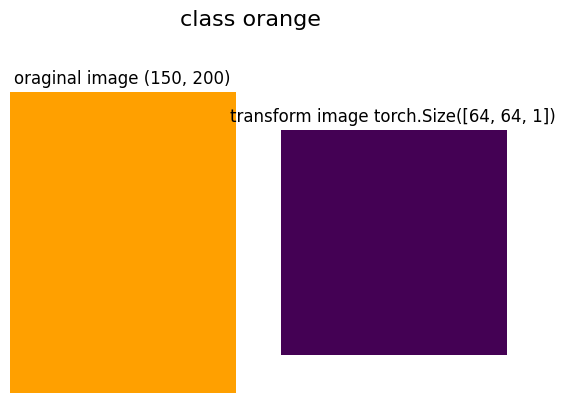

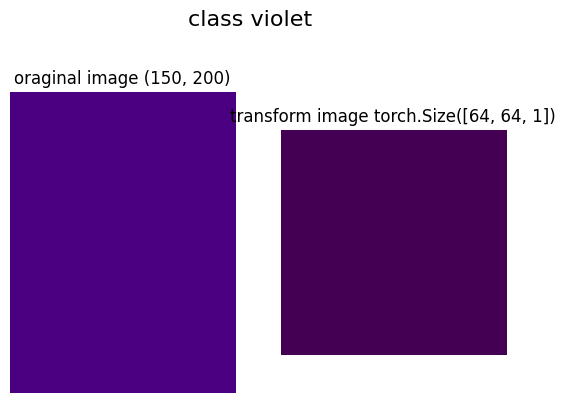

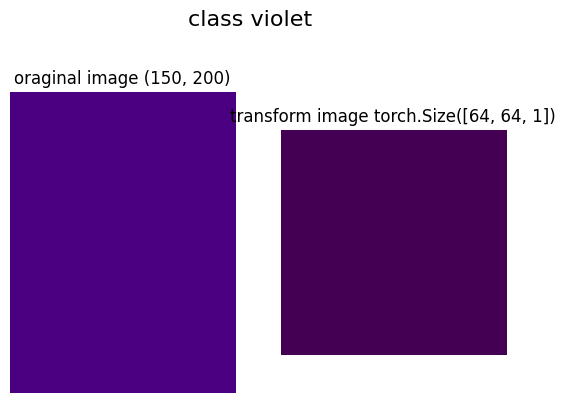

In [12]:
def plot_image(image_path, tranform, n=5, seed=42):
  if seed:
    random.seed(seed)
  random_image_path = random.sample(image_path, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"oraginal image {f.size}")
      ax[0].axis(False)

      transfoem_image = tranform(f).permute(1,2,0)
      ax[1].imshow(transfoem_image)
      ax[1].set_title(f"transform image {transfoem_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class {image_path.parent.stem}", fontsize=16)

plot_image(image_path=image_path_list,
           tranform = data_transform,
           n=5,
           seed=42)

In [13]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 372
     Root location: data/color_blindness/Color Recognition/Train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 49
     Root location: data/color_blindness/Color Recognition/Test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
class_name_idx = train_data.class_to_idx
class_name_idx

{'Black': 0,
 'blue': 1,
 'brown': 2,
 'green': 3,
 'orange': 4,
 'red': 5,
 'violet': 6,
 'white': 7,
 'yellow': 8}

In [15]:
class_name = train_data.classes
class_name

['Black',
 'blue',
 'brown',
 'green',
 'orange',
 'red',
 'violet',
 'white',
 'yellow']

In [16]:
train_data.samples[133]

('data/color_blindness/Color Recognition/Train/orange/orange - Copy (61).png',
 4)

In [17]:
img, label = train_data[0][0], train_data[0][1]
print(f"img: {img}")
print(f"img shape: {img.shape}")
print(f"img datatype: {img.dtype}")
print(f"label: {label}")
print(f"label datatype: {type(label)}")

img: tensor([[[0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         ...,
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843]],

        [[0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         ...,
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843]],

        [[0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1843],
         [0.1843, 0.1843, 0.1843,  ..., 0.1843, 0.184

orignal img torch.Size([3, 64, 64]) => [c, h, w]
 img  prmuted torch.Size([64, 64, 3]) => [h, w, c]


Text(0.5, 1.0, 'Black')

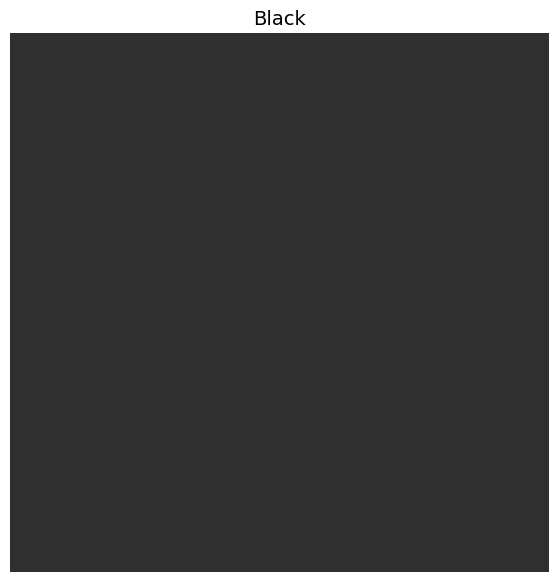

In [18]:
img_permute = img.permute(1,2,0)
print(f"orignal img {img.shape} => [c, h, w]")
print(f" img  prmuted {img_permute.shape} => [h, w, c]")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_name[label], fontsize=14)

In [19]:
from torch.utils.data import DataLoader
Batch_size =32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=Batch_size,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=Batch_size,
                              num_workers=1,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c36efa28b60>,
 <torch.utils.data.dataloader.DataLoader at 0x7c36ef98a1e0>)

In [20]:
len(train_dataloader), len(test_dataloader)

(12, 2)

In [21]:
len(train_data), len(test_data)

(372, 49)

In [22]:
img, label = next(iter(train_dataloader))
print(f" img {img.shape} => [c, h, w]")
print(f"label {label.shape} ")

 img torch.Size([32, 3, 64, 64]) => [c, h, w]
label torch.Size([32]) 


In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [24]:
target_directory = train_dir
print(target_directory)

class_name_fount = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_fount

data/color_blindness/Color Recognition/Train


['Black',
 'blue',
 'brown',
 'green',
 'orange',
 'red',
 'violet',
 'white',
 'yellow']

In [25]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """find the class folder """
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"not find class in {directory}")
  return classes
find_classes(target_directory)

['Black',
 'blue',
 'brown',
 'green',
 'orange',
 'red',
 'violet',
 'white',
 'yellow']

In [26]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [27]:
find_classes(train_dir)

(['Black',
  'blue',
  'brown',
  'green',
  'orange',
  'red',
  'violet',
  'white',
  'yellow'],
 {'Black': 0,
  'blue': 1,
  'brown': 2,
  'green': 3,
  'orange': 4,
  'red': 5,
  'violet': 6,
  'white': 7,
  'yellow': 8})

In [28]:
from torch.utils.data import Dataset

class Imagefoldercustom(Dataset):
  #initlizer custom dataset
  def __init__(self, targ_dir:str, transform=None):
    #get all image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.png"))

    #tranform image tensors
    self.transform = transform

    # create class and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # load image
  def load_image(self, index:int) -> Image.Image:
    "open image"
    image_path = self.paths[index]
    return Image.open(image_path)

  #len path
  def __len__(self):
    return len(self.paths)

  def __gititem__(self, index:int) ->Tuple[torch.Tensor, int] :
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      img, class_idx

In [29]:
from torchvision import transforms


train_transform = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
                                      ])

test_transform = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()
                                      ])

In [30]:
train_data_custom = Imagefoldercustom(targ_dir=train_dir,
                                      transform=train_transform)

test_data_custom = Imagefoldercustom(targ_dir=test_dir,
                                      transform=test_transform)

train_data_custom, test_data_custom

(<__main__.Imagefoldercustom at 0x7c36ef8593a0>,
 <__main__.Imagefoldercustom at 0x7c36ef894950>)

In [31]:
len(train_data_custom), len(test_data_custom)

(312, 42)

In [32]:
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

False
True
True


In [33]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

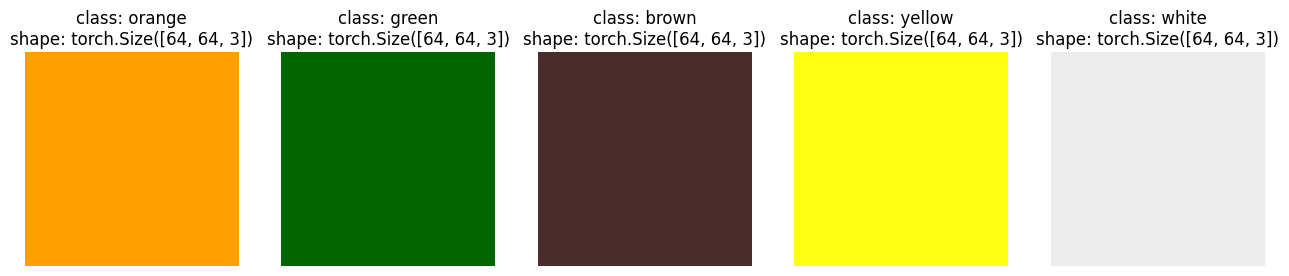

In [34]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=train_data.classes,
                      seed=None)

In [35]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
Batch_size = 32
# Num_workers = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=Batch_size, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=Batch_size,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c36ef91bc20>,
 <torch.utils.data.dataloader.DataLoader at 0x7c36ef989b20>)

In [36]:
len(train_dataloader_custom), len(test_dataloader_custom)

(10, 2)

In [37]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [38]:
image_path_lists = list(image_path.glob("*/*/*/*.jpg"))
image_path_lists[:10]

[PosixPath('data/color_blindness/Color Recognition/Valid/Black/black2.jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/Black/black9.jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/Black/black8.jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/Black/black5.jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/Black/black7.jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/Black/black4.jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/red/red - Copy (52).jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/red/red - Copy (49).jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/red/red - Copy (50).jpg'),
 PosixPath('data/color_blindness/Color Recognition/Valid/red/red - Copy (47).jpg')]

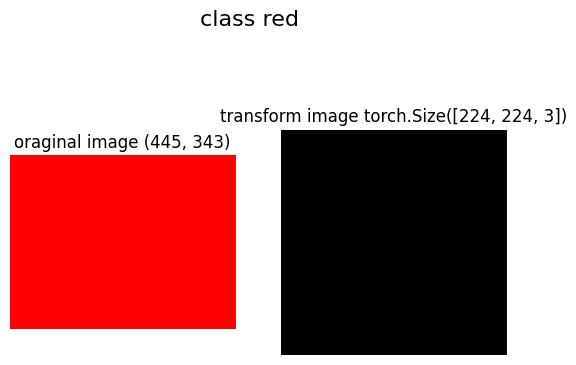

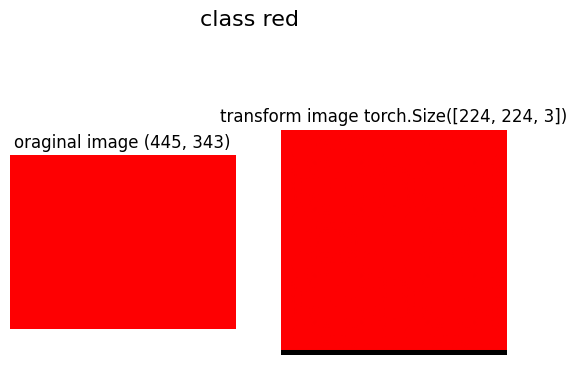

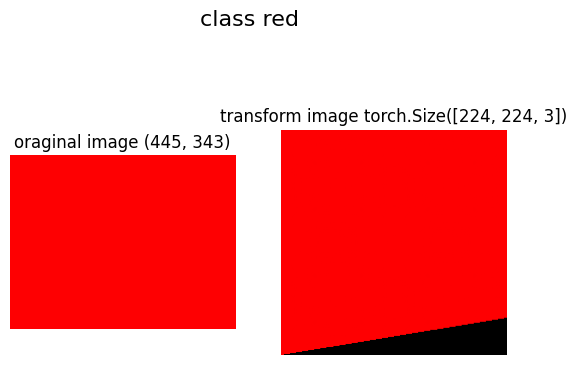

In [39]:
plot_image(
    image_path=image_path_lists,
    tranform=train_transforms,
    n=3,
    seed=None
)

In [40]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [41]:
# 1. Load and transform data
# from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
# import os
# from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7c36efc029c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c380daca900>)

In [42]:
from torch import nn
class tinyVgg(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int)->None:
               super().__init__()
               self.conv_block_1 = nn.Sequential(

                   nn.Conv2d(in_channels=input_shape,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=1),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels=hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=1),

                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2, stride=2)
              )

               self.conv_block_2 = nn.Sequential(

                 nn.Conv2d(in_channels=hidden_units,
                           out_channels=hidden_units,
                           kernel_size=3,
                           padding=1),
                 nn.ReLU(),
                 nn.Conv2d(in_channels=hidden_units,
                           out_channels=hidden_units,
                           kernel_size=3,
                           padding=1),
                 nn.ReLU(),
                 nn.MaxPool2d(kernel_size=2, stride=2)
              )
               self.classifier = nn.Sequential(
                  nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
                  nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
              )
  def forward(self, x: torch.Tensor):
           x = self.conv_block_1(x)
          #  print(x.shape)
           x = self.conv_block_2(x)
          #  print(x.shape)
           x = self.classifier(x)
          #  print(x.shape)
           return x


In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [44]:
torch.manual_seed(42)
model_0 = tinyVgg(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

tinyVgg(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=9, bias=True)
  )
)

In [45]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [46]:
model_0(image_batch.to(device))

tensor([[ 0.0649,  0.0517,  0.0172, -0.0303, -0.0405,  0.0432, -0.0586,  0.0808,
         -0.0193],
        [ 0.0858,  0.0703,  0.0281, -0.0387, -0.0469,  0.0508, -0.0632,  0.1063,
         -0.0219],
        [ 0.0858,  0.0703,  0.0281, -0.0387, -0.0469,  0.0508, -0.0632,  0.1063,
         -0.0219],
        [ 0.0918,  0.0746,  0.0308, -0.0408, -0.0482,  0.0533, -0.0643,  0.1135,
         -0.0214],
        [ 0.0858,  0.0703,  0.0281, -0.0387, -0.0469,  0.0508, -0.0632,  0.1063,
         -0.0219],
        [ 0.0662,  0.0549,  0.0214, -0.0314, -0.0401,  0.0435, -0.0577,  0.0849,
         -0.0190],
        [ 0.0649,  0.0517,  0.0172, -0.0303, -0.0405,  0.0432, -0.0586,  0.0808,
         -0.0193],
        [ 0.0798,  0.0654,  0.0252, -0.0363, -0.0455,  0.0481, -0.0620,  0.0987,
         -0.0218],
        [ 0.0649,  0.0517,  0.0172, -0.0303, -0.0405,  0.0432, -0.0586,  0.0808,
         -0.0193],
        [ 0.0820,  0.0651,  0.0243, -0.0374, -0.0460,  0.0498, -0.0626,  0.0996,
         -0.0207],


In [47]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
tinyVgg                                  [1, 9]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [48]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [49]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [50]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [51]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 12

# Recreate an instance of TinyVGG
model_0 = tinyVgg(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.0505 | train_acc: 0.1667 | test_loss: 2.1141 | test_acc: 0.0938
Epoch: 2 | train_loss: 1.7161 | train_acc: 0.2859 | test_loss: 1.6312 | test_acc: 0.2408
Epoch: 3 | train_loss: 1.3316 | train_acc: 0.4375 | test_loss: 1.3478 | test_acc: 0.3483
Epoch: 4 | train_loss: 0.9485 | train_acc: 0.6083 | test_loss: 0.8279 | test_acc: 0.7812
Epoch: 5 | train_loss: 0.6010 | train_acc: 0.7911 | test_loss: 0.5011 | test_acc: 0.7812
Epoch: 6 | train_loss: 0.3585 | train_acc: 0.8370 | test_loss: 0.3530 | test_acc: 0.6875
Epoch: 7 | train_loss: 0.2309 | train_acc: 0.9062 | test_loss: 0.1938 | test_acc: 1.0000
Epoch: 8 | train_loss: 0.1106 | train_acc: 1.0000 | test_loss: 0.0866 | test_acc: 1.0000
Epoch: 9 | train_loss: 0.0430 | train_acc: 1.0000 | test_loss: 0.0283 | test_acc: 1.0000
Epoch: 10 | train_loss: 0.0159 | train_acc: 1.0000 | test_loss: 0.0112 | test_acc: 1.0000
Epoch: 11 | train_loss: 0.0070 | train_acc: 1.0000 | test_loss: 0.0062 | test_acc: 1.0000
Epoch: 12 | train_l

In [52]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

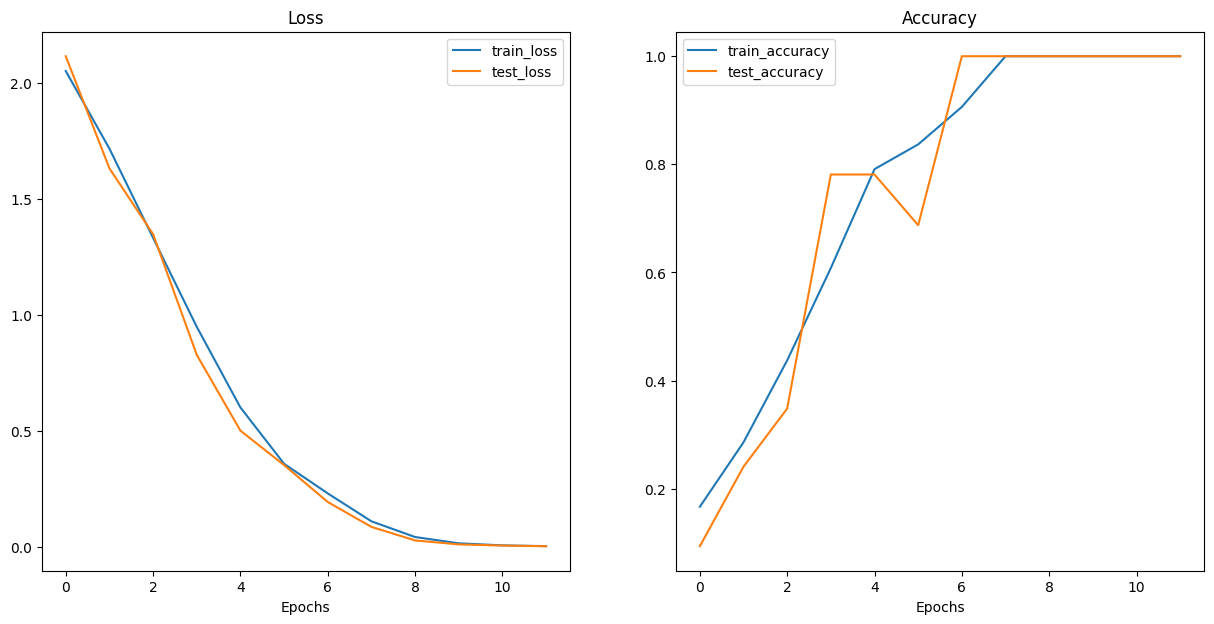

In [53]:
plot_loss_curves(model_0_results)

In [54]:
import pandas as pd

model_dataframs_acc = pd.DataFrame(model_0_results)
model_dataframs_acc

,train_loss,train_acc,test_loss,test_acc
0,2.050461,0.166667,2.114089,0.093750
1,1.716071,0.285938,1.631212,0.240809
2,1.331596,0.437500,1.347753,0.348346
3,0.948513,0.608333,0.827879,0.781250
4,0.601024,0.791146,0.501056,0.781250
5,0.358457,0.836979,0.353011,0.687500
6,0.230876,0.906250,0.193846,1.000000
7,0.110626,1.000000,0.086598,1.000000
8,0.043024,1.000000,0.028297,1.000000
9,0.015899,1.000000,0.011208,1.000000


In [55]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [56]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({train_data.classes[test_labels[0]]})")

Test sample image shape: torch.Size([3, 64, 64])
Test sample label: 7 (white)


In [ ]:
from pathlib import Path


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True
)

# Create model save path
MODEL_NAME_1 = "03_pytorch_computer_vision_model_2.h5"
MODEL_SAVE_PATH_1 = MODEL_PATH / MODEL_NAME_1

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH_1}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH_1)

In [57]:
from pathlib import Path
import torch

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "image_color_classification.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/image_color_classification.pth
